# **SECTION 0: Imports**

In [96]:
import numpy as np

import pandas as pd 

from collections import Counter

from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy import stats

import matplotlib.pyplot as plt


import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

import pandas as pd 
from sklearn import model_selection
from sklearn.model_selection import train_test_split

%matplotlib inline

# **SECTION 1: Acquire, preprocess, and analyze data.**

## **Data Acquisition Step**

### Hepatitis Dataset

In [97]:
hepatitisDataColNames = ['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME', 'HISTOLOGY']
hepatitisData = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data", names=hepatitisDataColNames)

# Preprocessing Step
hepatitisDataFiltered = hepatitisData[~hepatitisData.eq('?').any(1)]
hepatitisDataFiltered.reset_index(drop=True, inplace=True) # reset the row indices 
hepatitisDataFiltered = hepatitisDataFiltered.apply(pd.to_numeric) # convert all row values from string to numberic
classColumn = hepatitisDataFiltered.pop('Class')
lastIndex = len(hepatitisDataFiltered.columns)
hepatitisDataFiltered.insert(lastIndex, 'Class', classColumn)

hepatitisDataFiltered

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,Class
0,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1,2
1,39,1,1,1,2,2,2,1,1,2,2,2,2,1.3,78,30,4.4,85,1,2
2,32,1,2,1,1,2,2,2,1,2,1,2,2,1.0,59,249,3.7,54,1,2
3,41,1,2,1,1,2,2,2,1,2,2,2,2,0.9,81,60,3.9,52,1,2
4,30,1,2,2,1,2,2,2,1,2,2,2,2,2.2,57,144,4.9,78,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,45,1,2,1,2,2,2,2,2,2,2,2,2,1.3,85,44,4.2,85,2,2
76,49,1,1,2,1,1,2,2,2,1,1,2,2,1.4,85,70,3.5,35,2,1
77,31,1,1,2,1,2,2,2,2,2,2,2,2,1.2,75,173,4.2,54,2,2
78,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2,2


### Diabetic Retinopathy Debrecen Dataset

In [98]:
DRDDataColNamesV1 = list(range(0, 20))
DRDDataColNamesV2 = ["Quality Assessment", "Pre-Screening Result", "MA Detection 1", "MA Detection 2", "MA Detection 3", "MA Detection 4", "MA Detection 5", "MA Detection 6", 
                 "MA Detection Exudates 1", "MA Detection Exudates 2", "MA Detection Exudates 3", "MA Detection Exudates 4", "MA Detection Exudates 5", "MA Detection Exudates 6", "MA Detection Exudates 7", "MA Detection Exudates 8",
                 "Euclid Distance", "Optic Disc Diameter", "AM/FM Classification", "Class"]
DRDData = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00329/messidor_features.arff", skiprows = 23, names=DRDDataColNamesV2)
DRDData = DRDData[~DRDData.eq('@data').any(1)] # Remove the last row containing unnecessary data

# Preprocessing Step
DRDDataFiltered = DRDData.astype(float)

DRDDataFiltered.drop(DRDDataFiltered[DRDDataFiltered['Quality Assessment'] == 0.0].index, inplace=True)
DRDDataFiltered.reset_index(drop=True, inplace=True) # reset the row indices
DRDDataFiltered['Class'] = DRDDataFiltered['Class'].astype(int)

DRDDataFiltered

,Quality Assessment,Pre-Screening Result,MA Detection 1,MA Detection 2,MA Detection 3,MA Detection 4,MA Detection 5,MA Detection 6,MA Detection Exudates 1,MA Detection Exudates 2,MA Detection Exudates 3,MA Detection Exudates 4,MA Detection Exudates 5,MA Detection Exudates 6,MA Detection Exudates 7,MA Detection Exudates 8,Euclid Distance,Optic Disc Diameter,AM/FM Classification,Class
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0,0
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0,0
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0,1
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0,0
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142,1.0,1.0,34.0,34.0,34.0,33.0,31.0,24.0,6.071765,0.937472,0.031145,0.003115,0.000000,0.000000,0.000000,0.000000,0.537470,0.116795,0.0,0
1143,1.0,1.0,49.0,49.0,49.0,49.0,45.0,37.0,63.197145,27.377668,8.067688,0.979548,0.001552,0.000000,0.000000,0.000000,0.516733,0.124190,0.0,0
1144,1.0,0.0,49.0,48.0,48.0,45.0,43.0,33.0,30.461898,13.966980,1.763305,0.137858,0.011221,0.000000,0.000000,0.000000,0.560632,0.129843,0.0,0
1145,1.0,1.0,39.0,36.0,29.0,23.0,13.0,7.0,40.525739,12.604947,4.740919,1.077570,0.563518,0.326860,0.239568,0.174584,0.485972,0.106690,1.0,1


## **Data Analysis**

### Hepatitis Dataset

In [99]:
age_sexStats = hepatitisDataFiltered[["AGE", "SEX"]].groupby("SEX").mean()

print("Old class distribution: LIVE: %d, DIE: %d" % ((hepatitisData['Class'].values == 2).sum(), (hepatitisData['Class'].values == 1).sum()))
print("Old class distribution: LIVE: %d, DIE: %d" % ((hepatitisDataFiltered['Class'].values == 2).sum(), (hepatitisDataFiltered['Class'].values == 1).sum()))

print("Mean age of death from hepatitis: %2d" % round(hepatitisDataFiltered.groupby(['Class'])['AGE'].mean()[1]))
print("Average of male hepatitis patients: %2d" % round(age_sexStats.at[1, 'AGE']))
print("Average of female hepatitis patients: %2d" % round(age_sexStats.at[2, 'AGE']))

print("________________________________________")

print("MEASURES OF CENTRAL TENDENCY")
print("Maximum in each class: ")
print(str(hepatitisDataFiltered.max()) + "\n")
print("Minimum in each class: ")
print(str(hepatitisDataFiltered.min()) + "\n")
print("Average in each class: ")
print(str(hepatitisDataFiltered.mean().round(0)) + "\n")

print("________________________________________")

print("MEASURES OF VARIABILITY\n")
print("Variance in each class: ")
print(str(hepatitisDataFiltered.var().round(0)) + "\n")
print("Standard deviation in each class: ")
print(str(hepatitisDataFiltered.std().round(0)) + "\n")
print("Skewness in each class: ")
print(str(hepatitisDataFiltered.skew().round(0)) + "\n")

print("________________________________________")
print("MEASURES OF CORRELATION BETWEEN PAIRS OF DATA \n")
print("Correlation of AGE and BILIRUBIN count: %f" % (hepatitisDataFiltered['AGE'].corr(hepatitisDataFiltered['BILIRUBIN'])))
print("Correlation of AGE and SEX count: %f" % (hepatitisDataFiltered['AGE'].corr(hepatitisDataFiltered['SEX'])))
print("Correlation of AGE and Class count: %f" % (hepatitisDataFiltered['AGE'].corr(hepatitisDataFiltered['Class'])))
print("Correlation of SEX and Class count: %f" % (hepatitisDataFiltered['SEX'].corr(hepatitisDataFiltered['Class'])))
print("Correlation of BILIRUBIN and PROTIME: %f" % (hepatitisDataFiltered['BILIRUBIN'].corr(hepatitisDataFiltered['PROTIME'])))
print("Correlation of SPIDERS and ASCITES: %f" % (hepatitisDataFiltered['SPIDERS'].corr(hepatitisDataFiltered['ASCITES'])))
print("Correlation of ASCITES and VARICES: %f" % (hepatitisDataFiltered['ASCITES'].corr(hepatitisDataFiltered['VARICES'])))

Old class distribution: LIVE: 123, DIE: 32
Old class distribution: LIVE: 67, DIE: 13
Mean age of death from hepatitis: 46
Average of male hepatitis patients: 41
Average of female hepatitis patients: 39
________________________________________
MEASURES OF CENTRAL TENDENCY
Maximum in each class: 
AGE                 72.0
SEX                  2.0
STEROID              2.0
ANTIVIRALS           2.0
FATIGUE              2.0
MALAISE              2.0
ANOREXIA             2.0
LIVER BIG            2.0
LIVER FIRM           2.0
SPLEEN PALPABLE      2.0
SPIDERS              2.0
ASCITES              2.0
VARICES              2.0
BILIRUBIN            4.8
ALK PHOSPHATE      280.0
SGOT               420.0
ALBUMIN              5.0
PROTIME            100.0
HISTOLOGY            2.0
Class                2.0
dtype: float64

Minimum in each class: 
AGE                20.0
SEX                 1.0
STEROID             1.0
ANTIVIRALS          1.0
FATIGUE             1.0
MALAISE             1.0
ANOREXIA            

### Diabetic Retinopathy Debrecen Dataset

In [100]:
print("Class distribution: Signs of DR: %d, No signs of DR: %d" % ((DRDDataFiltered['Class'].values == 1.0).sum(), (DRDDataFiltered['Class'].values == 0.0).sum()))
print("Pre-Screening Result distribution: Signs of DR: %d, No signs of DR: %d" % ((DRDDataFiltered['Pre-Screening Result'].values == 1.0).sum(), (DRDDataFiltered['Pre-Screening Result'].values == 0.0).sum()))
print("Quality Assessment distribution before filtering: Sufficient quality: %d, Bad quality: %d" % ((DRDData['Quality Assessment'].values == '1').sum(), (DRDData['Quality Assessment'].values == '0').sum()))
print("Quality Assessment distribution after filtering: Sufficient quality: %d, Bad quality: %d \n" % ((DRDDataFiltered['Quality Assessment'].values == 1.0).sum(), (DRDDataFiltered['Quality Assessment'].values == 0.0).sum()))

print("________________________________________")

print("MEASURES OF CENTRAL TENDENCY\n")
print("Maximum in each class: ")
print(str(DRDDataFiltered.max().round(0)) + "\n")
print("Minimum in each class: ")
print(str(DRDDataFiltered.min().round(0)) + "\n")
print("Mean in each class: ")
print(str(DRDDataFiltered.mean().round(0)) + "\n")

print("________________________________________")

print("MEASURES OF VARIABILITY\n")
print("Variance in each class: ")
print(str(DRDDataFiltered.var().round(0)) + "\n")
print("Standard deviation in each class: ")
print(str(DRDDataFiltered.std().round(0)) + "\n")
print("Skewness in each class: ")
print(str(DRDDataFiltered.skew().round(0)) + "\n")

print("________________________________________")

print("MEASURES OF CORRELATION BETWEEN PAIRS OF DATA \n")
print("Correlation of MA Detection 1 and MA Detection Exudates 1: %f" % (DRDDataFiltered['MA Detection 1'].corr(DRDDataFiltered['MA Detection Exudates 1'])))
print("Correlation of MA Detection 1 and MA Detection 2: %f" % (DRDDataFiltered['MA Detection 1'].corr(DRDDataFiltered['MA Detection 2'])))
print("Correlation of MA Detection Exudates 4 and MA Detection Exudates 5: %f" % (DRDDataFiltered['MA Detection Exudates 4'].corr(DRDDataFiltered['MA Detection Exudates 5'])))
print("Correlation of Optic Disc Diameter and AM/FM Classification: %f" % (DRDDataFiltered['Optic Disc Diameter'].corr(DRDDataFiltered['AM/FM Classification'])))


Class distribution: Signs of DR: 611, No signs of DR: 536
Pre-Screening Result distribution: Signs of DR: 1053, No signs of DR: 94
Quality Assessment distribution before filtering: Sufficient quality: 1147, Bad quality: 4
Quality Assessment distribution after filtering: Sufficient quality: 1147, Bad quality: 0 

________________________________________
MEASURES OF CENTRAL TENDENCY

Maximum in each class: 
Quality Assessment           1.0
Pre-Screening Result         1.0
MA Detection 1             151.0
MA Detection 2             132.0
MA Detection 3             120.0
MA Detection 4             105.0
MA Detection 5              97.0
MA Detection 6              89.0
MA Detection Exudates 1    404.0
MA Detection Exudates 2    167.0
MA Detection Exudates 3    106.0
MA Detection Exudates 4     60.0
MA Detection Exudates 5     51.0
MA Detection Exudates 6     20.0
MA Detection Exudates 7      6.0
MA Detection Exudates 8      3.0
Euclid Distance              1.0
Optic Disc Diameter          0

# **SECTION 2: Machine Learning Algorithm Implementations**

## **K - Nearest Neighbors**

In [101]:
# Distance functions
def euclidean(x1, x2): return np.sqrt(np.sum(x1 - x2)**2)
def manhattan(x1, x2): return np.sum(np.abs(x1 - x2))

class KNN:
    def __init__(self, K=1, distanceFunction=euclidean):
        self.K = K
        self.distanceFunction = distanceFunction

        return 
    
    # Store the training samples 
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    # Perform label prediction for all the test data
    def predict(self, X_test):
        predictedLabels = [self.predict_single_sample(x_test) for x_test in X_test]

        return np.array(predictedLabels)
    
    # Helper method that predicts the categorical output for a single sample
    def predict_single_sample(self, x_test):
        # computes distances from the single sample x_test to all the training samples
        distances = [self.distanceFunction(x_test, x_train) for x_train in self.X_train]
        kNearestNeighborIndices = [distances.index(smallestDistance) for smallestDistance in sorted(distances)[0: self.K]]
        kNearestNeighborsLabels = [self.y_train[k_index] for k_index in kNearestNeighborIndices]

        # find the most common class label
        commonElements = Counter(kNearestNeighborsLabels).most_common()
        mostCommon = commonElements[0][0]

        return mostCommon

    def predict_proba(self, X_test):
        predictedProbabilities = [self.predict_proba_single_sample(x_test) for x_test in X_test]

        return np.array(predictedProbabilities)

    def predict_proba_single_sample(self, x_test):
      
        distances = [self.distanceFunction(x_test, x_train) for x_train in self.X_train]
        kNearestNeighborIndices = [distances.index(smallestDistance) for smallestDistance in sorted(distances)[0: self.K]]
        kNearestNeighborsLabels = [self.y_train[k_index] for k_index in kNearestNeighborIndices]

        commonElements = Counter(kNearestNeighborsLabels).most_common()
        mostCommon = commonElements[0][0]
        probability = kNearestNeighborsLabels.count(mostCommon) / len(kNearestNeighborsLabels)
        
        return probability

## **Weighted K - Nearest Neighbors**

In [102]:
def euclidean(x1, x2): return np.sqrt(np.sum(x2 - x1)**2)
def manhattan(x1, x2): return np.sum(np.abs(x1 - x2))

# K-Nearest Neighbors
class WeightedKNN:
    def __init__(self, K=1, distanceFunction=euclidean):
        self.K = K
        self.distanceFunction = distanceFunction
        return 
    
    # Store the training samples 
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    # Perform label prediction for all the test data
    def predict(self, X_test):
        predictedLabels = [self.predict_single_sample(x_test) for x_test in X_test]
        return np.array(predictedLabels)
    
    # Helper method that predicts the categorical output for a single sample
    def predict_single_sample(self, x_test):
        # computes distances from the single sample x_test to all the training samples
        distances = [self.distanceFunction(x_test, x_train) for x_train in self.X_train]
        kNearestNeighborIndices = [distances.index(smallestDistance) for smallestDistance in sorted(distances)[0: self.K]]
        kNearestNeighborsLabels = [self.y_train[k_index] for k_index in kNearestNeighborIndices]

        freq1 = 0
        freq2 = 0

        for i in range(0, self.K):
            if kNearestNeighborsLabels[i] == 0 and abs(distances[kNearestNeighborIndices[i]]) > 0:
                freq1 += 1/distances[kNearestNeighborIndices[i]]
            elif kNearestNeighborsLabels[i] == 1 and abs(distances[kNearestNeighborIndices[i]]) > 0:
                freq2 += 1/distances[kNearestNeighborIndices[i]]

        return 0 if freq1 > freq2 else 1

    def predict_proba(self, X_test):
        predictedProbabilities = [self.predict_proba_single_sample(x_test) for x_test in X_test]
        return np.array(predictedProbabilities)

    def predict_proba_single_sample(self, x_test):
        distances = [self.distanceFunction(x_test, x_train) for x_train in self.X_train]
        kNearestNeighborIndices = [distances.index(smallestDistance) for smallestDistance in sorted(distances)[0: self.K]]
        kNearestNeighborsLabels = [self.y_train[k_index] for k_index in kNearestNeighborIndices]

        freq1 = 0
        freq2 = 0
        for i in range(0, self.K):
            if kNearestNeighborsLabels[i] == 0 and abs(distances[kNearestNeighborIndices[i]]) > 0:
                freq1 += 1/distances[kNearestNeighborIndices[i]]
            elif kNearestNeighborsLabels[i] == 1 and abs(distances[kNearestNeighborIndices[i]]) > 0:
                freq2 += 1/distances[kNearestNeighborIndices[i]]

        prob1 = freq1 / (freq1 + freq2)
        prob2 = freq2 / (freq1 + freq2)

        return max(prob1, prob2)

## **Decision Tree**

In [103]:
#computes misclassification cost by subtracting the maximum probability of any class
def cost_misclassification(labels):
    counts = np.bincount(labels) 
    class_probs = counts / np.sum(counts)
    #you could compress both the steps above by doing class_probs = np.bincount(labels) / len(labels)
    return 1 - np.max(class_probs)

#computes entropy of the labels by computing the class probabilities
def cost_entropy(labels):
    class_probs = np.bincount(labels) / len(labels)
    class_probs = class_probs[class_probs > 0]              #this steps is remove 0 probabilities for removing numerical issues while computing log
    return -np.sum(class_probs * np.log2(class_probs))       #expression for entropy -\sigma p(x)log[p(x)]

#computes the gini index cost
def cost_gini_index(labels):
    class_probs = np.bincount(labels) / len(labels)
    return 1 - np.sum(np.square(class_probs))               #expression for gini index 1-\sigma p(x)^2


# Determine if the feature is categorical or numeric
def type_Of_Feature(featureLabels):
    hepatitisDataNumerical = ['AGE', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME']
    hepatitisDataCategorical = ['Class', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES', 'HISTOLOGY']
    DRDDataNumerical = ['MA Detection 1', 'MA Detection 2', 'MA Detection 3', 'MA Detection 4', 'MA Detection 5', 'MA Detection 6', 
                 'MA Detection Exudates 1', 'MA Detection Exudates 2', 'MA Detection Exudates 3', 'MA Detection Exudates 4', 'MA Detection Exudates 5', 'MA Detection Exudates 6', 'MA Detection Exudates 7', 'MA Detection Exudates 8',
                 'Euclid Distance', 'Optic Disc Diameter']
    DRDDataCategorical = ['Quality Assessment', 'Pre-Screening Result', 'AM/FM Classification', 'Class']

    feature_types = []
    try:
      hepatitisDataColNames.index(featureLabels[0])
      for i in featureLabels:
        if i in hepatitisDataCategorical:
          feature_types.append('Categorical')
        elif i in hepatitisDataNumerical:
          feature_types.append('Continuous')
    except:
      for i in featureLabels:
        if i in DRDDataCategorical:
          feature_types.append('Categorical')
        elif i in DRDDataNumerical:
          feature_types.append('Continuous')

    return feature_types

class Node:
    def __init__(self, data_indices, parent):
        self.data_indices = data_indices                    #stores the data indices which are in the region defined by this node
        self.left = None                                    #stores the left child of the node 
        self.right = None                                   #stores the right child of the node
        self.split_feature = None                           #the feature for split at this node
        self.split_value = None                             #the value of the feature for split at this node
        if parent:
            self.depth = parent.depth + 1                   #obtain the dept of the node by adding one to dept of the parent 
            self.num_classes = parent.num_classes           #copies the num classes from the parent 
            self.data = parent.data                         #copies the data from the parent
            self.labels = parent.labels                     #copies the labels from the parent
            class_prob = np.bincount(self.labels[data_indices], minlength=self.num_classes) #this is counting frequency of different labels in the region defined by this node
            self.class_prob = class_prob / np.sum(class_prob)  #stores the class probability for the node
            #note that we'll use the class probabilites of the leaf nodes for making predictions after the tree is built

def greedy_test(node, cost_fn, typeOfFeatures):
    #initialize the best parameter values
    best_cost = np.inf
    best_feature, best_value = None, None
    num_instances, num_features = node.data.shape
    #sort the features to get the test value candidates by taking the average of consecutive sorted feature values 
    data_sorted = np.sort(node.data[node.data_indices],axis=0)
    test_candidates = (data_sorted[1:] + data_sorted[:-1]) / 2.
    for f in range(num_features):
        #stores the data corresponding to the f-th feature
        data_f = node.data[node.data_indices, f]
        for test in test_candidates[:,f]:
            #Split the indices using the test value of f-th feature
            if typeOfFeatures[f] == 'Continuous':
              left_indices = node.data_indices[data_f <= test]
              right_indices = node.data_indices[data_f > test]
            elif typeOfFeatures[f] == 'Categorical':
              left_indices = node.data_indices[data_f == test]
              right_indices = node.data_indices[data_f != test]
            #we can't have a split where a child has zero element
            #if this is true over all the test features and their test values  then the function returns the best cost as infinity
            if len(left_indices) == 0 or len(right_indices) == 0:                
                continue
            #compute the left and right cost based on the current split                                                         
            left_cost = cost_fn(node.labels[left_indices])
            right_cost = cost_fn(node.labels[right_indices])
            num_left, num_right = left_indices.shape[0], right_indices.shape[0]
            #get the combined cost using the weighted sum of left and right cost
            cost = (num_left * left_cost + num_right * right_cost)/num_instances
            #update only when a lower cost is encountered
            if cost < best_cost:
                best_cost = cost
                best_feature = f
                best_value = test
    return best_cost, best_feature, best_value

class DecisionTree:
    def __init__(self, num_classes=None, max_depth=3, cost_fn=cost_misclassification, min_leaf_instances=1):
        self.max_depth = max_depth      #maximum dept for termination 
        self.root = None                #stores the root of the decision tree 
        self.cost_fn = cost_fn          #stores the cost function of the decision tree 
        self.num_classes = num_classes  #stores the total number of classes
        self.min_leaf_instances = min_leaf_instances  #minimum number of instances in a leaf for termination

        
    def fit(self, data, labels, typeOfFeatures):
        self.data = data
        self.labels = labels
        if self.num_classes is None:
            self.num_classes = np.max(labels) + 1
        #below are initialization of the root of the decision tree
        self.root = Node(np.arange(data.shape[0]), None)
        self.root.data = data
        self.root.labels = labels
        self.root.num_classes = self.num_classes
        self.root.depth = 0
        #to recursively build the rest of the tree
        self._fit_tree(self.root, typeOfFeatures)
        return self
    
    def predict(self, data_test):
        class_probs = np.zeros((data_test.shape[0], self.num_classes))
        for n, x in enumerate(data_test):
            node = self.root
            #loop along the dept of the tree looking region where the present data sample fall in based on the split feature and value
            while node.left:
                if x[node.split_feature] <= node.split_value:
                    node = node.left
                else:
                    node = node.right
            #the loop terminates when you reach a leaf of the tree and the class probability of that node is taken for prediction
            # print(n)
            class_probs[n,:] = node.class_prob
        return class_probs

    def _fit_tree(self, node, typeOfFeatures):
        #This gives the condition for termination of the recursion resulting in a leaf node
        if node.depth == self.max_depth or len(node.data_indices) <= self.min_leaf_instances:
            return
        #greedily select the best test by minimizing the cost
        cost, split_feature, split_value = greedy_test(node, self.cost_fn, typeOfFeatures)
        #if the cost returned is infinity it means that it is not possible to split the node and hence terminate
        if np.isinf(cost):
            return
        #print(f'best feature: {split_feature}, value {split_value}, cost {cost}')
        #to get a boolean array suggesting which data indices corresponding to this node are in the left of the split
        test = node.data[node.data_indices,split_feature] <= split_value
        #store the split feature and value of the node
        node.split_feature = split_feature
        node.split_value = split_value
        #define new nodes which are going to be the left and right child of the present node
        left = Node(node.data_indices[test], node)
        right = Node(node.data_indices[np.logical_not(test)], node)
        #recursive call to the _fit_tree()
        self._fit_tree(left, typeOfFeatures)
        self._fit_tree(right, typeOfFeatures)
        #assign the left and right child to present child
        node.left = left
        node.right = right

    def predict_proba(self, X_test):
        probs_test = self.predict(X_test)
        return np.max(probs_test, 1)

# **SECTION 3: Experiments**

## **Part 0 - Preparing the datasets for expiriments.**



### Hepatitis Dataset

In [104]:
# All features
hepatitisDataFiltered

# One-hot encoding
hepatitisDataOneHotEncoded = hepatitisDataFiltered.copy()
hepatitisDataOneHotEncoded.drop(['AGE', 'SEX'], axis=1, inplace=True)
hepatitisDataOneHotEncoded[['Class', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES', 'HISTOLOGY']] \
  = hepatitisDataOneHotEncoded[['Class', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES', 'HISTOLOGY']].subtract(1)
X_hepatitisOneHot, y_hepatitisOneHot = np.array(hepatitisDataOneHotEncoded.loc[:, 'STEROID': 'HISTOLOGY']), np.array(hepatitisDataOneHotEncoded['Class'])

hepatitisDataOneHotEncoded

,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,Class
0,1,1,1,1,1,1,1,1,1,1,1,0.9,95,28,4.0,75,0,1
1,0,0,1,1,1,0,0,1,1,1,1,1.3,78,30,4.4,85,0,1
2,1,0,0,1,1,1,0,1,0,1,1,1.0,59,249,3.7,54,0,1
3,1,0,0,1,1,1,0,1,1,1,1,0.9,81,60,3.9,52,0,1
4,1,1,0,1,1,1,0,1,1,1,1,2.2,57,144,4.9,78,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1,0,1,1,1,1,1,1,1,1,1,1.3,85,44,4.2,85,1,1
76,0,1,0,0,1,1,1,0,0,1,1,1.4,85,70,3.5,35,1,0
77,0,1,0,1,1,1,1,1,1,1,1,1.2,75,173,4.2,54,1,1
78,0,1,0,1,1,1,1,0,0,1,0,1.5,81,19,4.1,48,1,1


### Diabetic Retinopathy Debrecen Dataset

In [105]:
# All features
DRDDataFiltered
X_DRD, y_DRD = np.array(DRDDataFiltered.loc[:, 'Quality Assessment': 'AM/FM Classification']), np.array(DRDDataFiltered['Class'].astype(int))

# Feature selection - exclude Quality Assessment and Pre-Screening Result columns
DRDDataFilteredFeatures = DRDDataFiltered.copy()
DRDDataFilteredFeatures = DRDDataFilteredFeatures.iloc[:, 2: 20]
X_DRDFilteredFeatures, y_DRDFilteredFeatures = np.array(DRDDataFilteredFeatures.loc[:, 'MA Detection 1': 'AM/FM Classification']), np.array(DRDDataFilteredFeatures['Class'].astype(int))

DRDDataFilteredFeatures

,MA Detection 1,MA Detection 2,MA Detection 3,MA Detection 4,MA Detection 5,MA Detection 6,MA Detection Exudates 1,MA Detection Exudates 2,MA Detection Exudates 3,MA Detection Exudates 4,MA Detection Exudates 5,MA Detection Exudates 6,MA Detection Exudates 7,MA Detection Exudates 8,Euclid Distance,Optic Disc Diameter,AM/FM Classification,Class
0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0,0
1,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0,0
2,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0,1
3,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0,0
4,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142,34.0,34.0,34.0,33.0,31.0,24.0,6.071765,0.937472,0.031145,0.003115,0.000000,0.000000,0.000000,0.000000,0.537470,0.116795,0.0,0
1143,49.0,49.0,49.0,49.0,45.0,37.0,63.197145,27.377668,8.067688,0.979548,0.001552,0.000000,0.000000,0.000000,0.516733,0.124190,0.0,0
1144,49.0,48.0,48.0,45.0,43.0,33.0,30.461898,13.966980,1.763305,0.137858,0.011221,0.000000,0.000000,0.000000,0.560632,0.129843,0.0,0
1145,39.0,36.0,29.0,23.0,13.0,7.0,40.525739,12.604947,4.740919,1.077570,0.563518,0.326860,0.239568,0.174584,0.485972,0.106690,1.0,1


## **Part 1 - Comparing the accuracy of K-Nearest Neighbors and Decision Tree algorithms.**

### **K - Nearest Neighbors**

In [106]:
def KNN_test_general(X, y, chosenK, chosenDistanceFunction, isWeightedKNN):
    classifier = WeightedKNN(K=chosenK, distanceFunction=chosenDistanceFunction) if isWeightedKNN else KNN(K=chosenK, distanceFunction=chosenDistanceFunction)
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.4, train_size=0.6, random_state=11, shuffle=True)
    X_train = StandardScaler().fit(X_train).transform(X_train)
    X_test = StandardScaler().fit(X_test).transform(X_test)
    classifier.fit(X_train, y_train)
    y_predictions = classifier.predict(X_test)
    accuracy = np.sum(y_predictions == y_test) / len(y_test)
    return accuracy


Initial Test: best K and best distance function have not yet been selected.

In [107]:
accuracyHepatitisDataset = KNN_test_general(X_hepatitisOneHot, y_hepatitisOneHot, 1, euclidean, False)
accuracyDRDDataset = KNN_test_general(X_DRDFilteredFeatures, y_DRDFilteredFeatures, 1, euclidean, False)

print("KNN accuracy for the Hepatitis Dataset for K = 1 and distanceFunction = euclidean: %.3f" % accuracyHepatitisDataset)
print("KNN accuracy for the DRD Dataset for K = 1 and distanceFunction = euclidean: %.3f" % accuracyDRDDataset)


KNN accuracy for the Hepatitis Dataset for K = 1 and distanceFunction = euclidean: 0.719
KNN accuracy for the DRD Dataset for K = 1 and distanceFunction = euclidean: 0.536


Final Test: best K and best distance function have been selected based on the test below.

In [108]:
accuracyHepatitisDataset = KNN_test_general(X_hepatitisOneHot, y_hepatitisOneHot, 3, manhattan, False)
accuracyDRDDataset = KNN_test_general(X_DRDFilteredFeatures, y_DRDFilteredFeatures, 12, manhattan, False)

print("KNN accuracy for the Hepatitis Dataset for K = 3 and distanceFunction = manhattan: %.3f" % accuracyHepatitisDataset)
print("KNN accuracy for the DRD Dataset for K = 12 and distanceFunction = manhattan: %.3f" % accuracyDRDDataset)

KNN accuracy for the Hepatitis Dataset for K = 3 and distanceFunction = manhattan: 0.906
KNN accuracy for the DRD Dataset for K = 12 and distanceFunction = manhattan: 0.651


### **Weighted K-Nearest Neighbors**

Initial Test: best K and best distance function have not yet been selected.

In [109]:
accuracyHepatitisDataset = KNN_test_general(X_hepatitisOneHot, y_hepatitisOneHot, 1, euclidean, True)
accuracyDRDDataset = KNN_test_general(X_DRDFilteredFeatures, y_DRDFilteredFeatures, 1, euclidean, True)

print("Weighted KNN accuracy for the Hepatitis Dataset for K = 1 and distanceFunction = euclidean: %.3f" % accuracyHepatitisDataset)
print("Weighted KNN accuracy for the DRD Dataset for K = 1 and distanceFunction = euclidean: %.3f" % accuracyDRDDataset)


Weighted KNN accuracy for the Hepatitis Dataset for K = 1 and distanceFunction = euclidean: 0.719
Weighted KNN accuracy for the DRD Dataset for K = 1 and distanceFunction = euclidean: 0.536


Final Test: best K and best distance function have been selected based on the test below.

In [110]:
accuracyHepatitisDataset = KNN_test_general(X_hepatitisOneHot, y_hepatitisOneHot, 3, manhattan, True)
accuracyDRDDataset = KNN_test_general(X_DRDFilteredFeatures, y_DRDFilteredFeatures, 3, manhattan, True)

print("Weighted KNN accuracy for the Hepatitis Dataset for K = 3 and distanceFunction = manhattan: %.3f" % accuracyHepatitisDataset)
print("Weighted KNN accuracy for the DRD Dataset for K = 3 and distanceFunction = manhattan: %.3f" % accuracyDRDDataset)


Weighted KNN accuracy for the Hepatitis Dataset for K = 3 and distanceFunction = manhattan: 0.875
Weighted KNN accuracy for the DRD Dataset for K = 3 and distanceFunction = manhattan: 0.625


### **Decision Tree**

In [111]:
# Feature labels for each dataset.
hepatitisFeatureNames = ['STEROID','ANTIVIRALS','FATIGUE','MALAISE','ANOREXIA','LIVER BIG','LIVER FIRM','SPLEEN PALPABLE','SPIDERS','ASCITES','VARICES','BILIRUBIN','ALK PHOSPHATE','SGOT','ALBUMIN','PROTIME','HISTOLOGY']
DRDFeatureNames = ['MA Detection 1', 'MA Detection 2', 'MA Detection 3', 'MA Detection 4', 'MA Detection 5', 'MA Detection 6', 'MA Detection Exudates 1', 'MA Detection Exudates 2', 'MA Detection Exudates 3', 'MA Detection Exudates 4', 'MA Detection Exudates 5', 'MA Detection Exudates 6', 'MA Detection Exudates 7', 'MA Detection Exudates 8', 'Euclid Distance', 'Optic Disc Diameter', 'AM/FM Classification']


def DT_test(X, y, chosenDepth, chosenCostFunction, featureLabels):
  featureTypes = type_Of_Feature(featureLabels)
  classifier = DecisionTree(max_depth=chosenDepth, cost_fn=chosenCostFunction)
  X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.4, train_size=0.6, random_state=11, shuffle=True)
  classifier.fit(X_train, y_train, featureTypes) 
  probs_test = classifier.predict(X_test) # Returns the probability of 0 and probability of 1                   
  predictions = np.argmax(probs_test, 1) # This returns the index, but since the Class is on 0/1 the output makes sense
  accuracy = np.sum(predictions == y_test) / len(y_test)
  
  return accuracy

Initial Test: best depth and best cost function have not yet been selected.

In [112]:
accuracyDT_HepatitisDataset = DT_test(X_hepatitisOneHot, y_hepatitisOneHot, 3, cost_misclassification, hepatitisFeatureNames) # default 3  and cost_misclassification
accuracyDT_DRDDataset = DT_test(X_DRDFilteredFeatures, y_DRDFilteredFeatures, 3, cost_misclassification, DRDFeatureNames)
print("DT accuracy for the Hepatitis Dataset for tree depth = 3 and cost_fn = cost_misclassification: %.3f" % accuracyDT_HepatitisDataset)
print("DT accuracy for the DRD Dataset for tree depth = 3 and cost_fn = cost_misclassification: %.3f" % accuracyDT_DRDDataset)

DT accuracy for the Hepatitis Dataset for tree depth = 3 and cost_fn = cost_misclassification: 0.875
DT accuracy for the DRD Dataset for tree depth = 3 and cost_fn = cost_misclassification: 0.595


Final Test: best depth and best cost function have been selected based on the tests below.

In [113]:
accuracyDT_HepatitisDataset = DT_test(X_hepatitisOneHot, y_hepatitisOneHot, 2, cost_misclassification, hepatitisFeatureNames) 
accuracyDT_DRDDataset = DT_test(X_DRDFilteredFeatures, y_DRDFilteredFeatures, 13, cost_misclassification, DRDFeatureNames)
print("DT accuracy for the Hepatitis Dataset for tree depth = 2 and cost_fn = cost_misclassification: %.3f" % accuracyDT_HepatitisDataset)
print("DT accuracy for the DRD Dataset for tree depth = 13 and cost_fn = cost_misclassification: %.3f" % accuracyDT_DRDDataset)

DT accuracy for the Hepatitis Dataset for tree depth = 2 and cost_fn = cost_misclassification: 0.875
DT accuracy for the DRD Dataset for tree depth = 13 and cost_fn = cost_misclassification: 0.643


## **Part 2: K-Nearest Neighbors: testing different K values and observing the effect on training data accuracy and test data accuracy.**

### **K-Nearest Neighbors**

In [114]:
chosenMaximumValueForK = 15
X_trainHepatitis, X_testHepatitis, y_trainHepatitis, y_testHepatitis = model_selection.train_test_split(X_hepatitisOneHot, y_hepatitisOneHot, test_size=0.3, train_size=0.7, random_state=11, shuffle=True)
X_trainHepatitis, X_validHepatitis, y_trainHepatitis, y_validHepatitis = model_selection.train_test_split(X_trainHepatitis, y_trainHepatitis, test_size=0.3, train_size=0.7,  random_state=11, shuffle=True)
X_trainDRD, X_testDRD, y_trainDRD, y_testDRD = model_selection.train_test_split(X_DRDFilteredFeatures, y_DRDFilteredFeatures, test_size=0.3, train_size=0.7,  random_state=11, shuffle=True)
X_trainDRD, X_validDRD, y_trainDRD, y_validDRD = model_selection.train_test_split(X_trainDRD, y_trainDRD, test_size=0.3, train_size=0.7,  random_state=11, shuffle=True)

def find_best_K(K_max, X_train, y_train, X_valid, y_valid, isWeightedKNN):
    validAcc = []
    X_train = StandardScaler().fit(X_train).transform(X_train)
    X_valid = StandardScaler().fit(X_valid).transform(X_valid)

    for k in range(1, K_max):
        classifier = WeightedKNN(K=k) if isWeightedKNN else KNN(K=k)
        classifier.fit(X_train, y_train)
        predictions = classifier.predict(X_valid)
        accuracy = np.sum(predictions == y_valid) / len(y_valid)
        validAcc.append(accuracy)
    return validAcc.index(max(validAcc)) + 1 # best valid K

def KNN_test(K_value, distFunction, X_train, y_train, testData, validationData, isWeightedKNN):
    X_train = StandardScaler().fit(X_train).transform(X_train)
    X_testData = StandardScaler().fit(testData).transform(testData)
    classifier = WeightedKNN(K=K_value, distanceFunction=distFunction) if isWeightedKNN else KNN(K=K_value, distanceFunction=distFunction)
    classifier.fit(X_train, y_train)
    y_predictions = classifier.predict(X_testData)
    accuracy = np.sum(y_predictions == validationData) / len(validationData)

    return accuracy

In [115]:
# Passing in testing data

bestK_HepatitisDataset = find_best_K(chosenMaximumValueForK, X_trainHepatitis, y_trainHepatitis, X_validHepatitis, y_validHepatitis, False)
bestK_DRDDataset = find_best_K(chosenMaximumValueForK, X_trainDRD, y_trainDRD, X_validDRD, y_validDRD, False)

accuracyHepatitisDataset = KNN_test(bestK_HepatitisDataset, euclidean, X_trainHepatitis, y_trainHepatitis, X_testHepatitis, y_testHepatitis, False)
accuracyDRDDataset = KNN_test(bestK_DRDDataset, euclidean, X_trainDRD, y_trainDRD, X_testDRD, y_testDRD, False)

print("Testing data passed into predict(): KNN accuracy for the Hepatitis Dataset for K = %d and distanceFunction = euclidean: %.3f" % (bestK_HepatitisDataset, accuracyHepatitisDataset))
print("Testing data passed into predict(): KNN accuracy for the DRD Dataset for K = %d and distanceFunction = euclidean: %.3f" % (bestK_DRDDataset, accuracyDRDDataset))

Testing data passed into predict(): KNN accuracy for the Hepatitis Dataset for K = 3 and distanceFunction = euclidean: 0.708
Testing data passed into predict(): KNN accuracy for the DRD Dataset for K = 12 and distanceFunction = euclidean: 0.583


In [116]:
# Passing in training data

accuracyHepatitisDataset = KNN_test(bestK_HepatitisDataset, euclidean, X_trainHepatitis, y_trainHepatitis, X_trainHepatitis, y_trainHepatitis, False)
accuracyDRDDataset = KNN_test(bestK_DRDDataset, euclidean, X_trainDRD, y_trainDRD, X_trainDRD, y_trainDRD, False)

print("Testing data passed into predict(): KNN accuracy for the Hepatitis Dataset for K = %d and distanceFunction = euclidean: %.3f" % (bestK_HepatitisDataset, accuracyHepatitisDataset))
print("Testing data passed into predict(): KNN accuracy for the DRD Dataset for K = %d and distanceFunction = euclidean: %.3f" % (bestK_DRDDataset, accuracyDRDDataset))

Testing data passed into predict(): KNN accuracy for the Hepatitis Dataset for K = 3 and distanceFunction = euclidean: 0.872
Testing data passed into predict(): KNN accuracy for the DRD Dataset for K = 12 and distanceFunction = euclidean: 0.756


### **Weighted K-Nearest Neighbors**

In [117]:
bestWeightedK_HepatitisDataset = find_best_K(chosenMaximumValueForK, X_trainHepatitis, y_trainHepatitis, X_validHepatitis, y_validHepatitis, True)
bestWeightedK_DRDDataset = find_best_K(chosenMaximumValueForK, X_trainDRD, y_trainDRD, X_validDRD, y_validDRD, True)

accuracyHepatitisDataset = KNN_test(bestWeightedK_HepatitisDataset, euclidean, X_trainHepatitis, y_trainHepatitis, X_testHepatitis, y_testHepatitis, True)
accuracyDRDDataset = KNN_test(bestWeightedK_DRDDataset, euclidean, X_trainDRD, y_trainDRD, X_testDRD, y_testDRD, True)

print("KNN accuracy for the Hepatitis Dataset for K = %d and distanceFunction = euclidean: %.3f" % (bestWeightedK_HepatitisDataset, accuracyHepatitisDataset))
print("KNN accuracy for the DRD Dataset for K = %d and distanceFunction = euclidean: %.3f" % (bestWeightedK_DRDDataset, accuracyDRDDataset))


KNN accuracy for the Hepatitis Dataset for K = 3 and distanceFunction = euclidean: 0.667
KNN accuracy for the DRD Dataset for K = 3 and distanceFunction = euclidean: 0.530


In [118]:
# Passing in training data 

accuracyHepatitisDataset = KNN_test(bestWeightedK_HepatitisDataset, euclidean, X_trainHepatitis, y_trainHepatitis, X_trainHepatitis, y_trainHepatitis, True)
accuracyDRDDataset = KNN_test(bestWeightedK_DRDDataset, euclidean, X_trainDRD, y_trainDRD, X_trainDRD, y_trainDRD, True)

print("KNN accuracy for the Hepatitis Dataset for K = %d and distanceFunction = euclidean: %.3f" % (bestWeightedK_HepatitisDataset, accuracyHepatitisDataset))
print("KNN accuracy for the DRD Dataset for K = %d and distanceFunction = euclidean: %.3f" % (bestWeightedK_DRDDataset, accuracyDRDDataset))

KNN accuracy for the Hepatitis Dataset for K = 3 and distanceFunction = euclidean: 0.718
KNN accuracy for the DRD Dataset for K = 3 and distanceFunction = euclidean: 0.538


## **Part 3 - Decision Tree: testing how maximum tree depth affects the performance of DT on the provided datasets.**

### Testing Function for Decision Trees


In [119]:
# Chosen maximum depth.
chosenMaximumValueForDepth = 20

# Feature labels for each dataset.
hepatitisFeatureNames = ['STEROID','ANTIVIRALS','FATIGUE','MALAISE','ANOREXIA','LIVER BIG','LIVER FIRM','SPLEEN PALPABLE','SPIDERS','ASCITES','VARICES','BILIRUBIN','ALK PHOSPHATE','SGOT','ALBUMIN','PROTIME','HISTOLOGY']
DRDFeatureNames = ['MA Detection 1', 'MA Detection 2', 'MA Detection 3', 'MA Detection 4', 'MA Detection 5', 'MA Detection 6', 'MA Detection Exudates 1', 'MA Detection Exudates 2', 'MA Detection Exudates 3', 'MA Detection Exudates 4', 'MA Detection Exudates 5', 'MA Detection Exudates 6', 'MA Detection Exudates 7', 'MA Detection Exudates 8', 'Euclid Distance', 'Optic Disc Diameter', 'AM/FM Classification']

# Function that returns the accuracy of DT given certain dataset components.
def DT_test(X_train, X_test, y_train, y_test, max_depth, cost_fn, featureNames):
    featureTypes = type_Of_Feature(featureNames)
    tree = DecisionTree(max_depth=max_depth, cost_fn=cost_fn)
    probs_test = tree.fit(X_train, y_train, featureTypes).predict(X_test)
    y_pred = np.argmax(probs_test,1)
    accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
    return accuracy
  
# Function that tests the DT for various depths and outputs the best depth in terms of accuracy.
def find_best_depth(X_train, X_valid, y_train, y_valid, max_depth_end, cost_fn, featureNames):
  validAcc = []
  for d in range(1, max_depth_end + 1):
    accuracy = DT_test(X_train, X_valid, y_train, y_valid, d, cost_fn, featureNames)
    validAcc.append(accuracy)
  return validAcc.index(max(validAcc)) + 1

X = X_hepatitisOneHot.copy()
Y = y_hepatitisOneHot.copy()

X_train_Hepatitis_DT_original, X_test_Hepatitis_DT, y_train_Hepatitis_DT_original, y_test_Hepatitis_DT = model_selection.train_test_split(X, Y, test_size=0.4, train_size=0.6, random_state=1234, shuffle=True)
X_train_Hepatitis_DT, X_valid_Hepatitis_DT, y_train_Hepatitis_DT, y_valid_Hepatitis_DT = model_selection.train_test_split(X_train_Hepatitis_DT_original, y_train_Hepatitis_DT_original, test_size=0.25, train_size=0.75, random_state=1234, shuffle=True)

X = X_DRDFilteredFeatures.copy()
Y = y_DRDFilteredFeatures.copy()

X_train_DRD_DT_original, X_test_DRD_DT, y_train_DRD_DT_original, y_test_DRD_DT = model_selection.train_test_split(X, Y, test_size=0.4, train_size=0.6, random_state=1234, shuffle=True)
X_train_DRD_DT, X_valid_DRD_DT, y_train_DRD_DT, y_valid_DRD_DT = model_selection.train_test_split(X_train_DRD_DT_original, y_train_DRD_DT_original, test_size=0.25, train_size=0.75, random_state=1234, shuffle=True)

### Hepatitis Dataset

In [120]:
# Passing in testing data
bestDepth_HepatitisDataset_DT = find_best_depth(X_train_Hepatitis_DT, X_valid_Hepatitis_DT, y_train_Hepatitis_DT, y_valid_Hepatitis_DT, chosenMaximumValueForDepth, cost_misclassification, hepatitisFeatureNames)
accuracy_HepatitisDataset_DT = DT_test(X_train_Hepatitis_DT_original, X_test_Hepatitis_DT, y_train_Hepatitis_DT_original, y_test_Hepatitis_DT, bestDepth_HepatitisDataset_DT, cost_misclassification, hepatitisFeatureNames)
print("Test:\tDT accuracy for the Hepatitis Dataset for Depth = %d and cost_Function = Misclassification: %.3f" % (bestDepth_HepatitisDataset_DT, accuracy_HepatitisDataset_DT))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in true_divide


Test:	DT accuracy for the Hepatitis Dataset for Depth = 2 and cost_Function = Misclassification: 0.812


In [121]:
# Passing in training data
accuracy_HepatitisDataset_DT = DT_test(X_train_Hepatitis_DT_original, X_train_Hepatitis_DT_original, y_train_Hepatitis_DT_original, y_train_Hepatitis_DT_original, bestDepth_HepatitisDataset_DT, cost_misclassification, hepatitisFeatureNames)
print("Test:\tDT accuracy for the Hepatitis Dataset for Depth = %d and cost_Function = Misclassification: %.3f" % (bestDepth_HepatitisDataset_DT, accuracy_HepatitisDataset_DT))

Test:	DT accuracy for the Hepatitis Dataset for Depth = 2 and cost_Function = Misclassification: 0.958


### Diabetic Retinopathy Debrecen Dataset

In [122]:
# Passing in testing data
bestDepth_DRDDataset_DT = find_best_depth(X_train_DRD_DT, X_valid_DRD_DT, y_train_DRD_DT, y_valid_DRD_DT, chosenMaximumValueForDepth, cost_misclassification, DRDFeatureNames)
accuracy_DRDDataset_DT = DT_test(X_train_DRD_DT_original, X_test_DRD_DT, y_train_DRD_DT_original, y_test_DRD_DT, bestDepth_DRDDataset_DT, cost_misclassification, DRDFeatureNames)
print("Test:\tDT accuracy for the DRD Dataset for Depth = %d and cost_Function = Misclassification: %.3f" % (bestDepth_DRDDataset_DT, accuracy_DRDDataset_DT))

Test:	DT accuracy for the DRD Dataset for Depth = 13 and cost_Function = Misclassification: 0.688


In [123]:
# Passing in training data
accuracy_DRDDataset_DT = DT_test(X_train_DRD_DT_original, X_train_DRD_DT_original, y_train_DRD_DT_original, y_train_DRD_DT_original, bestDepth_DRDDataset_DT, cost_misclassification, DRDFeatureNames)
print("Test:\tDT accuracy for the DRD Dataset for Depth = %d and cost_Function = Misclassification: %.3f" % (bestDepth_DRDDataset_DT, accuracy_DRDDataset_DT))

Test:	DT accuracy for the DRD Dataset for Depth = 13 and cost_Function = Misclassification: 0.836


## **Part 4 - Testing the effect of different distance and cost functions.**

### **K - Nearest Neighbors Distance Functions**

In [124]:
distanceFunctions = [('euclidean', euclidean), ('manhattan', manhattan)]

def find_best_distance_function(distanceFunctions, X_train, y_train, X_valid, y_valid, isWeightedKNN):
  predictionVals = {}

  for distFunction in distanceFunctions:
    classifier = WeightedKNN(distanceFunction=distFunction[1]) if isWeightedKNN else KNN(distanceFunction=distFunction[1])
    classifier.fit(X_train, y_train) # Returns the probability of 0 and probability of 1
    predictions = classifier.predict(X_valid)                         
    accuracy = np.sum(predictions == y_valid) / len(y_valid)
    predictionVals[distFunction[0]] = round(accuracy, 3)
  return max(predictionVals, key=predictionVals.get) # best distance function
  print(predictionVals)

**K - Nearest Neighbors Zha**

In [125]:
# Test on Testing Dataset

bestDistFunctionHepatitis = find_best_distance_function(distanceFunctions, X_trainHepatitis, y_trainHepatitis, X_validHepatitis, y_validHepatitis, False)
bestDistFunctionDRD = find_best_distance_function(distanceFunctions, X_trainDRD, y_trainDRD, X_validDRD, y_validDRD, False)
print("Best distance function for Hepatitis Dataset:", bestDistFunctionHepatitis)
print("Best distance function for DRD Dataset:", bestDistFunctionDRD)

accuracyHepatitisDataset = KNN_test(bestK_HepatitisDataset, euclidean, X_trainHepatitis, y_trainHepatitis, X_testHepatitis, y_testHepatitis, False)
accuracyDRDDataset = KNN_test(bestK_DRDDataset, manhattan, X_trainDRD, y_trainDRD, X_testDRD, y_testDRD, False)

print("KNN accuracy for the Hepatitis Dataset for K = %d and distanceFunction = %s: %.3f" % (bestK_HepatitisDataset, bestDistFunctionHepatitis, accuracyHepatitisDataset))
print("KNN accuracy for the DRD Dataset for K = %d and distanceFunction = %s: %.3f" % (bestK_DRDDataset, bestDistFunctionDRD, accuracyDRDDataset))

Best distance function for Hepatitis Dataset: manhattan
Best distance function for DRD Dataset: manhattan
KNN accuracy for the Hepatitis Dataset for K = 3 and distanceFunction = manhattan: 0.708
KNN accuracy for the DRD Dataset for K = 12 and distanceFunction = manhattan: 0.635


In [126]:
# Test on Training Dataset

accuracyHepatitisDataset = KNN_test(bestK_HepatitisDataset, manhattan, X_trainHepatitis, y_trainHepatitis, X_trainHepatitis, y_trainHepatitis, False)
accuracyDRDDataset = KNN_test(bestK_DRDDataset, manhattan, X_trainDRD, y_trainDRD, X_trainDRD, y_trainDRD, False)

print("KNN accuracy for the Hepatitis Dataset for K = %d and distanceFunction = %s: %.3f" % (bestK_HepatitisDataset, bestDistFunctionHepatitis, accuracyHepatitisDataset))
print("KNN accuracy for the DRD Dataset for K = %d and distanceFunction = %s: %.3f" % (bestK_DRDDataset, bestDistFunctionDRD, accuracyDRDDataset))

KNN accuracy for the Hepatitis Dataset for K = 3 and distanceFunction = manhattan: 0.923
KNN accuracy for the DRD Dataset for K = 12 and distanceFunction = manhattan: 0.763


**Weighted K - Nearest Neighbors**

In [127]:
# Test on Testing Dataset

bestWeightedDistFunctionHepatitis = find_best_distance_function(distanceFunctions, X_trainHepatitis, y_trainHepatitis, X_validHepatitis, y_validHepatitis, True)
bestWeightedDistFunctionDRD = find_best_distance_function(distanceFunctions, X_trainDRD, y_trainDRD, X_validDRD, y_validDRD, True)
print("Best distance function for Hepatitis Dataset:", bestWeightedDistFunctionHepatitis)
print("Best distance function for DRD Dataset:", bestWeightedDistFunctionDRD)

accuracyHepatitisDataset = KNN_test(bestWeightedK_HepatitisDataset, manhattan, X_trainHepatitis, y_trainHepatitis, X_testHepatitis, y_testHepatitis, True)
accuracyDRDDataset = KNN_test(bestWeightedK_DRDDataset, manhattan, X_trainDRD, y_trainDRD, X_testDRD, y_testDRD, True)

print("Weighted KNN accuracy for the Hepatitis Dataset for K = %d and distanceFunction = %s: %.3f" % (bestWeightedK_HepatitisDataset, bestWeightedDistFunctionHepatitis, accuracyHepatitisDataset))
print("Weighted KNN accuracy for the DRD Dataset for K = %d and distanceFunction = %s: %.3f" % (bestWeightedK_DRDDataset, bestWeightedDistFunctionDRD, accuracyDRDDataset))


Best distance function for Hepatitis Dataset: manhattan
Best distance function for DRD Dataset: manhattan
Weighted KNN accuracy for the Hepatitis Dataset for K = 3 and distanceFunction = manhattan: 0.833
Weighted KNN accuracy for the DRD Dataset for K = 3 and distanceFunction = manhattan: 0.609


In [128]:
# Test on Training Dataset

accuracyHepatitisDataset = KNN_test(bestWeightedK_HepatitisDataset, manhattan, X_trainHepatitis, y_trainHepatitis, X_trainHepatitis, y_trainHepatitis, True)
accuracyDRDDataset = KNN_test(bestWeightedK_DRDDataset, manhattan, X_trainDRD, y_trainDRD, X_trainDRD, y_trainDRD, True)

print("Weighted KNN accuracy for the Hepatitis Dataset for K = %d and distanceFunction = %s: %.3f" % (bestWeightedK_HepatitisDataset, bestWeightedDistFunctionHepatitis, accuracyHepatitisDataset))
print("Weighted KNN accuracy for the DRD Dataset for K = %d and distanceFunction = %s: %.3f" % (bestWeightedK_DRDDataset, bestWeightedDistFunctionDRD, accuracyDRDDataset))


Weighted KNN accuracy for the Hepatitis Dataset for K = 3 and distanceFunction = manhattan: 0.795
Weighted KNN accuracy for the DRD Dataset for K = 3 and distanceFunction = manhattan: 0.611


### **Decision Tree Cost Functions**

Cost Function DT Testing Functions

In [129]:
costFunctions = [('Misclassification', cost_misclassification), ('Entropy', cost_entropy), ('Gini Index', cost_gini_index)]

def find_best_cost_function(costFunctions, bestDepth, X_train, y_train, X_valid, y_valid, X_train_original, y_train_original, X_test, y_test, featureNames, datasetName):
  best_function_title = None
  best_function = None
  best_accuracy = 0.
  for costFunction in costFunctions:
    accuracy = DT_test(X_train, X_valid, y_train, y_valid, bestDepth, costFunction[1], featureNames)
    print("DT accuracy for the %s Dataset for Depth = %d and distanceFunction = %s: %.3f" % (datasetName, bestDepth, costFunction[0], accuracy))
    if accuracy > best_accuracy:
      best_function_title = costFunction[0]
      best_function = costFunction[1]
      best_accuracy = accuracy

  final_accuracy = DT_test(X_train_original, X_test, y_train_original, y_test, bestDepth, best_function, featureNames)
  print("BEST:\tDT accuracy for the %s Dataset for Depth = %d and distanceFunction = %s: %.3f" % (datasetName, bestDepth, best_function_title, final_accuracy))

# Feature labels for each dataset.
hepatitisFeatureNames = ['STEROID','ANTIVIRALS','FATIGUE','MALAISE','ANOREXIA','LIVER BIG','LIVER FIRM','SPLEEN PALPABLE','SPIDERS','ASCITES','VARICES','BILIRUBIN','ALK PHOSPHATE','SGOT','ALBUMIN','PROTIME','HISTOLOGY']
DRDFeatureNames = ['MA Detection 1', 'MA Detection 2', 'MA Detection 3', 'MA Detection 4', 'MA Detection 5', 'MA Detection 6', 'MA Detection Exudates 1', 'MA Detection Exudates 2', 'MA Detection Exudates 3', 'MA Detection Exudates 4', 'MA Detection Exudates 5', 'MA Detection Exudates 6', 'MA Detection Exudates 7', 'MA Detection Exudates 8', 'Euclid Distance', 'Optic Disc Diameter', 'AM/FM Classification']

X = X_hepatitisOneHot.copy()
Y = y_hepatitisOneHot.copy()

X_train_Hepatitis_DT_original, X_test_Hepatitis_DT, y_train_Hepatitis_DT_original, y_test_Hepatitis_DT = model_selection.train_test_split(X, Y, test_size=0.4, train_size=0.6, random_state=1234, shuffle=True)
X_train_Hepatitis_DT, X_valid_Hepatitis_DT, y_train_Hepatitis_DT, y_valid_Hepatitis_DT = model_selection.train_test_split(X_train_Hepatitis_DT_original, y_train_Hepatitis_DT_original, test_size=0.25, train_size=0.75, random_state=1234, shuffle=True)

X = X_DRDFilteredFeatures.copy()
Y = y_DRDFilteredFeatures.copy()

X_train_DRD_DT_original, X_test_DRD_DT, y_train_DRD_DT_original, y_test_DRD_DT = model_selection.train_test_split(X, Y, test_size=0.4, train_size=0.6, random_state=1234, shuffle=True)
X_train_DRD_DT, X_valid_DRD_DT, y_train_DRD_DT, y_valid_DRD_DT = model_selection.train_test_split(X_train_DRD_DT_original, y_train_DRD_DT_original, test_size=0.25, train_size=0.75, random_state=1234, shuffle=True)


### Hepatitis Dataset

In [130]:
# Test on Training Dataset
find_best_cost_function(costFunctions, 2, X_train_Hepatitis_DT, y_train_Hepatitis_DT, X_valid_Hepatitis_DT, y_valid_Hepatitis_DT, X_train_Hepatitis_DT_original, y_train_Hepatitis_DT_original, X_test_Hepatitis_DT, y_test_Hepatitis_DT, hepatitisFeatureNames, 'Hepatitis')

DT accuracy for the Hepatitis Dataset for Depth = 2 and distanceFunction = Misclassification: 1.000
DT accuracy for the Hepatitis Dataset for Depth = 2 and distanceFunction = Entropy: 0.833
DT accuracy for the Hepatitis Dataset for Depth = 2 and distanceFunction = Gini Index: 0.583
BEST:	DT accuracy for the Hepatitis Dataset for Depth = 2 and distanceFunction = Misclassification: 0.812


### DRD Dataset

In [131]:
# Test on Training Dataset
find_best_cost_function(costFunctions, 13, X_train_DRD_DT, y_train_DRD_DT, X_valid_DRD_DT, y_valid_DRD_DT, X_train_DRD_DT_original, y_train_DRD_DT_original, X_test_DRD_DT, y_test_DRD_DT, DRDFeatureNames, 'DRD')

DT accuracy for the DRD Dataset for Depth = 13 and distanceFunction = Misclassification: 0.622
DT accuracy for the DRD Dataset for Depth = 13 and distanceFunction = Entropy: 0.570
DT accuracy for the DRD Dataset for Depth = 13 and distanceFunction = Gini Index: 0.523
BEST:	DT accuracy for the DRD Dataset for Depth = 13 and distanceFunction = Misclassification: 0.688


## **Part 5 - Plotting decision boundaries for K-Nearest Neighbors and Decision Trees.**

### K - Nearest Neighbors

In [132]:
def visualize_accuracy_KNN(chosenDistanceFunction, chosenK, X, y):
  classifier = KNN(K=chosenK, distanceFunction=chosenDistanceFunction)
  X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.4, train_size=0.6, random_state=11, shuffle=True)
  X_train = StandardScaler().fit(X_train).transform(X_train)
  X_test = StandardScaler().fit(X_test).transform(X_test)
  classifier.fit(X_train, y_train)
  y_predictions = classifier.predict(X_test)
  accuracy = np.sum(y_predictions == y_test) / len(y_test)
  return accuracy

def find_best_features_KNN(dataset, features, best_k):
  best_features = []
  best_accuracy = 0.
  for i in range(0, len(features)):
    for j in range(i + 1, len(features)):
      feature_1 = features[i]
      feature_2 = features[j]
      data = dataset.copy()
      data = data[[feature_1, feature_2, 'Class']]
      X_data, y_data = np.array(data.loc[:, feature_1: feature_2]), np.array(data['Class'].astype(int))
      accuracy = visualize_accuracy_KNN(manhattan, best_k, X_data, y_data)

      if accuracy > best_accuracy:
        best_features = [feature_1, feature_2]
        best_accuracy = accuracy
        # print(best_features)

  return best_features, best_accuracy

def display_best_feature_graph_KNN(dataset, features, best_K, bestDistanceFunction, title):
  feature_1 = features[0]
  feature_2 = features[1]
  data = dataset.copy()
  data = data[[feature_1, feature_2, 'Class']]
  x, y = np.array(data.loc[:, feature_1: feature_2]), np.array(data['Class'].astype(int))

  x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.4, train_size=0.6, random_state=11, shuffle=True)

  # Train, Correct, Misclassified
  print('')
  classifier = KNN(K=best_K, distanceFunction=bestDistanceFunction)
  classifier.fit(x_train, y_train)
  predictions = classifier.predict(x_test)
  accuracy = np.sum(predictions == y_test) / len(y_test)
  correct = y_test == predictions
  incorrect = np.logical_not(correct)
  plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=.5, label='train')
  plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=predictions[correct], label='correct')
  plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')
  plt.xlabel(features[0])
  plt.ylabel(features[1])
  plt.legend()
  plt.title(title + ' Train, Correct, Misclassified')
  plt.show()

  # Decision Boundaries
  print('')
  x0v = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 200)
  x1v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 200)
  x0,x1 = np.meshgrid(x0v, x1v)
  x_all = np.vstack((x0.ravel(),x1.ravel())).T

  model = KNN(K=best_K, distanceFunction=bestDistanceFunction)
  y_train_prob = np.zeros((y_train.shape[0], 2))
  y_train_prob[np.arange(y_train.shape[0]), y_train] = 1
  classifier.fit(x_train, y_train)
  y_prob_all = classifier.predict(x_all)

  y_train_prob_color = []
  for i in y_train_prob:
    y_train_prob_color.append(i[1])

  plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all, marker='.', alpha=.1)
  plt.scatter(x_train[:,0], x_train[:,1], c=y_train_prob_color, marker='o', alpha=1)
  plt.xlabel(features[0])
  plt.ylabel(features[1])
  plt.title(title + ' Decision Boundaries')
  plt.show()

Hepatitis Dataset

Best features are: 
['MALAISE', 'PROTIME']
Best accuracy is: 0.90625



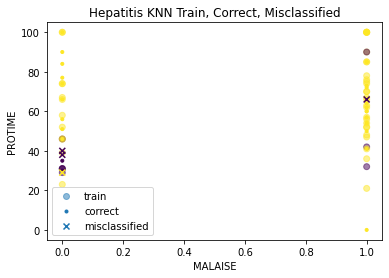

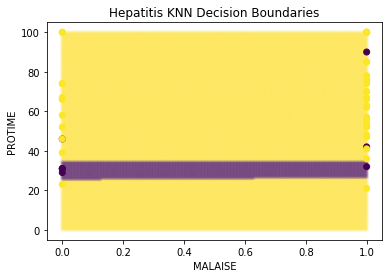

In [133]:
hepatitisFeatureNames = ['STEROID','ANTIVIRALS','FATIGUE','MALAISE','ANOREXIA','LIVER BIG','LIVER FIRM','SPLEEN PALPABLE','SPIDERS','ASCITES','VARICES','BILIRUBIN','ALK PHOSPHATE','SGOT','ALBUMIN','PROTIME','HISTOLOGY']
features_Hepatitis, accuracy_Hepatitis = find_best_features_KNN(hepatitisDataOneHotEncoded, hepatitisFeatureNames, 3)
print('Best features are: ')
print(features_Hepatitis)
print('Best accuracy is: ' + str(accuracy_Hepatitis))
display_best_feature_graph_KNN(hepatitisDataOneHotEncoded, features_Hepatitis, 3, manhattan,'Hepatitis KNN')

Diabetic Retinopathy Debrecen Dataset

Best features are: 
['MA Detection 2', 'MA Detection 4']
Best accuracy is: 1



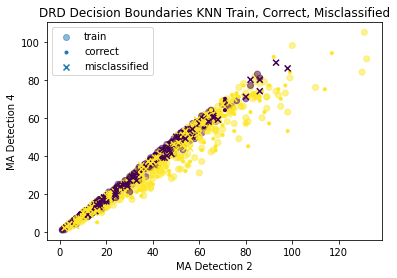

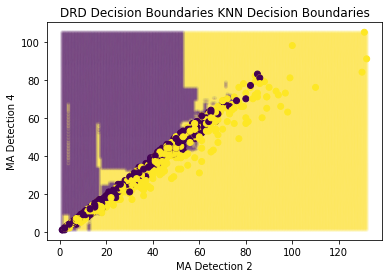

In [134]:
DRDFeatureNames = ['MA Detection 1', 'MA Detection 2', 'MA Detection 3', 'MA Detection 4', 'MA Detection 5', 'MA Detection 6', 'MA Detection Exudates 1', 'MA Detection Exudates 2', 'MA Detection Exudates 3', 'MA Detection Exudates 4', 'MA Detection Exudates 5', 'MA Detection Exudates 6', 'MA Detection Exudates 7', 'MA Detection Exudates 8', 'Euclid Distance', 'Optic Disc Diameter', 'AM/FM Classification']
features_DRD, accuracy_DRD = find_best_features_KNN(DRDDataFilteredFeatures, DRDFeatureNames, 12)
print('Best features are: ')
print(features_DRD)
print('Best accuracy is: ' + str(round(accuracy_DRD, )))
display_best_feature_graph_KNN(DRDDataFilteredFeatures, features_DRD, 12, manhattan, 'DRD Decision Boundaries KNN')

### Decision Trees

Decision Boundaries DT Testing Code

In [135]:
def visualize_accuracy_DT(bestCostFunction, bestTreeDepth, X, y, y_axis, x_axis):
    featureLabels = [y_axis, x_axis]
    featureTypes = type_Of_Feature(featureLabels)
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.4, train_size=0.6, random_state=11, shuffle=True)
    classifier = DecisionTree(cost_fn=bestCostFunction, max_depth=bestTreeDepth)
    probs_test = classifier.fit(X_train, y_train, featureTypes).predict(X_test)
    y_pred = np.argmax(probs_test,1)
    accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
    return accuracy

def find_best_features_DT(dataset, features, max_depth, bestCostFunction):
    best_features = []
    best_accuracy = 0.
    for i in range(0, len(features)):
        for j in range(i + 1, len(features)):
            feature_1 = features[i]
            feature_2 = features[j]
            data = dataset.copy()
            data = data[[feature_1, feature_2, 'Class']]
            X_data, y_data = np.array(data.loc[:, feature_1: feature_2]), np.array(data['Class'].astype(int))
            accuracy = visualize_accuracy_DT(bestCostFunction, max_depth, X_data, y_data, feature_1, feature_2)

            if accuracy > best_accuracy:
                best_features = [feature_1, feature_2]
                best_accuracy = accuracy

    return best_features, best_accuracy

def display_best_feature_graph_DT(dataset, features, best_depth, bestCostFunction, title):
    feature_1 = features[0]
    feature_2 = features[1]
    data = dataset.copy()
    data = data[[feature_1, feature_2, 'Class']]
    x, y = np.array(data.loc[:, feature_1: feature_2]), np.array(data['Class'].astype(int))

    featureTypes = type_Of_Feature(features)
    x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.4, train_size=0.6, random_state=11, shuffle=True)

    # Train, Correct, Misclassified
    print('')
    tree = DecisionTree(max_depth=best_depth, cost_fn=bestCostFunction)
    probs_test = tree.fit(x_train, y_train, featureTypes).predict(x_test)
    y_pred = np.argmax(probs_test,1)
    accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
    correct = y_test == y_pred
    incorrect = np.logical_not(correct)
    plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=.5, label='train')
    plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
    plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.legend()
    plt.title(title + ' Train, Correct, Misclassified')
    plt.show()

    # Decision Boundaries
    print('')
    x0v = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 200)
    x1v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 200)
    x0,x1 = np.meshgrid(x0v, x1v)
    x_all = np.vstack((x0.ravel(),x1.ravel())).T

    model = DecisionTree(max_depth=best_depth, cost_fn=bestCostFunction)
    y_train_prob = np.zeros((y_train.shape[0], 2))
    y_train_prob[np.arange(y_train.shape[0]), y_train] = 1
    y_prob_all = model.fit(x_train, y_train, featureTypes).predict(x_all)
        
    y_prob_all_color = []
    for i in y_prob_all:
        if i[0] < 0.5:
            y_prob_all_color.append(1)
        elif i[0] >= 0.5:
            y_prob_all_color.append(0)

    y_train_prob_color = []
    for i in y_train_prob:
        if i[0] < 0.5:
            y_train_prob_color.append(1)
        elif i[0] >= 0.5:
            y_train_prob_color.append(0)

    plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all_color, marker='.', alpha=.1)
    plt.scatter(x_train[:,0], x_train[:,1], c=y_train_prob_color, marker='o', alpha=1)
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title(title + ' Decision Boundaries')
    plt.show()
    print('')

Hepatitis Dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in true_divide


Best features are: 
['STEROID', 'ALK PHOSPHATE']
Best accuracy is: 0.875



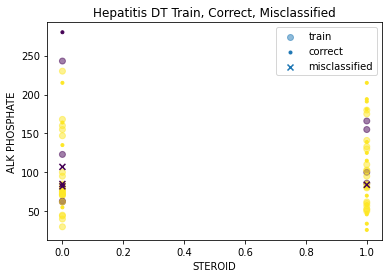

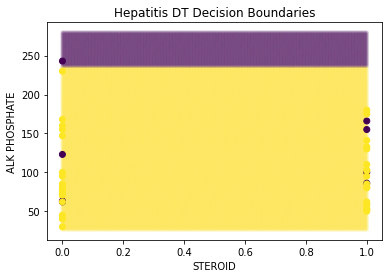

In [136]:
hepatitisFeatureNames = ['STEROID','ANTIVIRALS','FATIGUE','MALAISE','ANOREXIA','LIVER BIG','LIVER FIRM','SPLEEN PALPABLE','SPIDERS','ASCITES','VARICES','BILIRUBIN','ALK PHOSPHATE','SGOT','ALBUMIN','PROTIME','HISTOLOGY']
features_Hepatitis, accuracy_Hepatitis = find_best_features_DT(hepatitisDataOneHotEncoded, hepatitisFeatureNames, 2, cost_misclassification)
print('Best features are: ')
print(features_Hepatitis)
print('Best accuracy is: ' + str(accuracy_Hepatitis))
display_best_feature_graph_DT(hepatitisDataOneHotEncoded, features_Hepatitis, 2, cost_misclassification, 'Hepatitis DT')

Diabetic Retinopathy Debrecen Dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in true_divide


Best features are: 
['MA Detection 1', 'MA Detection 3']
Best accuracy is: 0.6971677559912854



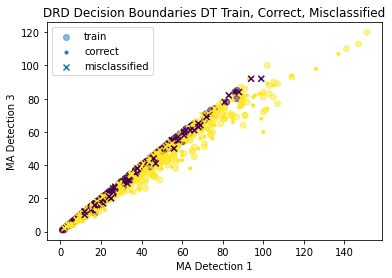

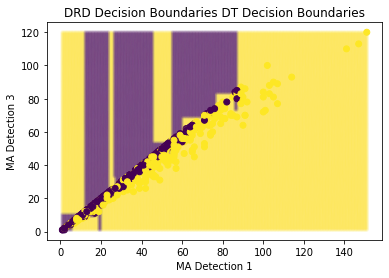

In [137]:
DRDFeatureNames = ['MA Detection 1', 'MA Detection 2', 'MA Detection 3', 'MA Detection 4', 'MA Detection 5', 'MA Detection 6', 'MA Detection Exudates 1', 'MA Detection Exudates 2', 'MA Detection Exudates 3', 'MA Detection Exudates 4', 'MA Detection Exudates 5', 'MA Detection Exudates 6', 'MA Detection Exudates 7', 'MA Detection Exudates 8', 'Euclid Distance', 'Optic Disc Diameter', 'AM/FM Classification']
features_DRD, accuracy_DRD = find_best_features_DT(DRDDataFilteredFeatures, DRDFeatureNames, 13, cost_misclassification)
print('Best features are: ')
print(features_DRD)
print('Best accuracy is: ' + str(accuracy_DRD))
display_best_feature_graph_DT(DRDDataFilteredFeatures, features_DRD, 13, cost_misclassification, 'DRD Decision Boundaries DT')

## **Part 6 - Testing K-fold cross validation.**

In [138]:
from sklearn.model_selection import KFold

def cross_validate(model, X_input, Y_output, K=5):
    kf = KFold(n_splits=K, random_state=1, shuffle=True)
    true_labels = np.array([0] * X_input.shape[0])
    pred_labels = np.array([0] * X_input.shape[0])
    pred_scores = np.array([0.0] * X_input.shape[0])
    for train_index, test_index in kf.split(X_input):
        model.fit(X_input[train_index], Y_output[train_index])
        true_labels[test_index] = Y_output[test_index]
        pred_labels[test_index] = model.predict(X_input[test_index])
        pred_scores[test_index] = model.predict_proba(X_input[test_index])
    return true_labels, pred_labels, pred_scores

### **K - Nearest Neighbors**

Hepatitis Dataset

In [139]:
knn = KNN(K=3, distanceFunction=manhattan)
X_hepatitisStandardized = StandardScaler().fit(X_hepatitisOneHot).transform(X_hepatitisOneHot)
true_labels, pred_labels, pred_scores = cross_validate(knn, X_hepatitisStandardized, y_hepatitisOneHot, K=5)
test_accuracy = np.sum(pred_labels == true_labels) / true_labels.shape[0]
print(f"Accuracy: {test_accuracy}")

Accuracy: 0.8625


In [140]:
knn = WeightedKNN(K=3, distanceFunction=manhattan)
X_hepatitisStandardized = StandardScaler().fit(X_hepatitisOneHot).transform(X_hepatitisOneHot)
true_labels, pred_labels, pred_scores = cross_validate(knn, X_hepatitisStandardized, y_hepatitisOneHot, K=5)
test_accuracy = np.sum(pred_labels == true_labels) / true_labels.shape[0]
print(f"Accuracy: {test_accuracy}")

Accuracy: 0.875


Diabetic Retinopathy Debrecen Dataset

In [141]:
knn = KNN(K=12, distanceFunction=manhattan)
X_DRDFilteredStandardized = StandardScaler().fit(X_DRDFilteredFeatures).transform(X_DRDFilteredFeatures)
true_labels, pred_labels, pred_scores = cross_validate(knn, X_DRDFilteredStandardized, y_DRDFilteredFeatures, K=5)
test_accuracy = np.sum(pred_labels == true_labels)/true_labels.shape[0]
print(f"Accuracy: {round(test_accuracy, 4)}")

Accuracy: 0.6521


In [142]:
knn = WeightedKNN(K=3, distanceFunction=manhattan)
X_DRDFilteredStandardized = StandardScaler().fit(X_DRDFilteredFeatures).transform(X_DRDFilteredFeatures)
true_labels, pred_labels, pred_scores = cross_validate(knn, X_DRDFilteredStandardized, y_DRDFilteredFeatures, K=5)
test_accuracy = np.sum(pred_labels == true_labels)/true_labels.shape[0]
print(f"Accuracy: {round(test_accuracy, 4)}")

Accuracy: 0.6225


### **Decision Tree**

In [143]:
# from sklearn.model_selection import KFold

# def cross_validate(model, X_input, Y_output, featureNames, K=5):
#     featureTypes = type_Of_Feature(featureNames)
#     kf = KFold(n_splits=K, random_state=1, shuffle=True)
#     true_labels = np.array([0] * X_input.shape[0])
#     pred_labels = np.array([0] * X_input.shape[0])
#     pred_scores = np.array([0.0] * X_input.shape[0])
#     for train_index, test_index in kf.split(X_input):
#         model.fit(X_input[train_index], Y_output[train_index], featureTypes)
#         true_labels[test_index] = Y_output[test_index]
#         pred_labels[test_index] = model.predict(X_input[test_index])
#         pred_scores[test_index] = model.predict_proba(X_input[test_index])
#     return true_labels, pred_labels, pred_scores

Hepatitis Dataset

In [144]:
# dt = DecisionTree(max_depth=2, cost_fn=cost_misclassification)
# X_hepatitisStandardized = StandardScaler().fit(X_hepatitisOneHot).transform(X_hepatitisOneHot)
# hepatitisFeatureNames = hepatitisDataColNames[1:]
# DRDFeatureNames = DRDDataColNamesV2[0:17]
# true_labels, pred_labels, pred_scores = cross_validate(dt, X_hepatitisOneHot, y_hepatitisOneHot, featureNames=hepatitisFeatureNames, K=5)
# test_accuracy = np.sum(pred_labels == true_labels) / true_labels.shape[0]
# print(f"Accuracy: {test_accuracy}")

Diabetic Retinopathy Debrecen Dataset

## **Part 7 - Implementing the Receiver Operator Characteristic (ROC) curve.**

In [145]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc(true_labels, pred_scores, title):
    fpr, tpr, thresholds = roc_curve(true_labels, pred_scores)
    roc_auc = roc_auc_score(true_labels, pred_scores)

    plt.clf()
    plt.plot(fpr, tpr, "b-", lw=2, label="AUROC = %0.2f"%roc_auc)
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(title)
    plt.legend(loc="best")

### **K - Nearest Neighbors**

Hepatitis Dataset

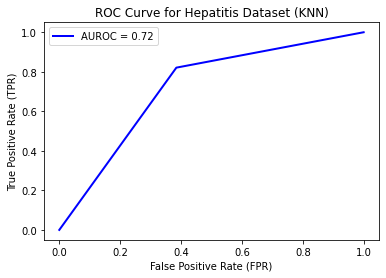

In [146]:
knn = KNN(K=3, distanceFunction=manhattan)
X_hepatitisStandardized = StandardScaler().fit(X_hepatitisOneHot).transform(X_hepatitisOneHot)
true_labels, _, pred_scores = cross_validate(knn, X_hepatitisStandardized, y_hepatitisOneHot, K=5)
plot_roc(true_labels, pred_scores, title='ROC Curve for Hepatitis Dataset (KNN)')

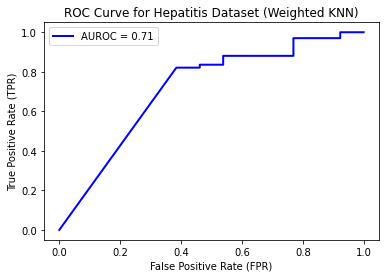

In [147]:
knn = WeightedKNN(K=3, distanceFunction=manhattan)
X_hepatitisStandardized = StandardScaler().fit(X_hepatitisOneHot).transform(X_hepatitisOneHot)
true_labels, _, pred_scores = cross_validate(knn, X_hepatitisStandardized, y_hepatitisOneHot, K=5)
plot_roc(true_labels, pred_scores, title='ROC Curve for Hepatitis Dataset (Weighted KNN)')

Diabetic Retinopathy Debrecen Dataset

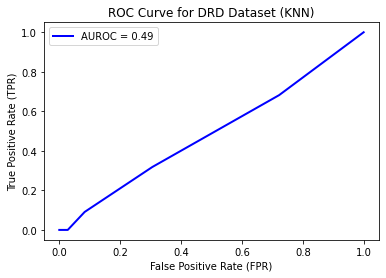

In [148]:
knn = KNN(K=12, distanceFunction=manhattan)
X_DRDFilteredStandardized = StandardScaler().fit(X_hepatitisOneHot).transform(X_hepatitisOneHot)
true_labels, _, pred_scores = cross_validate(knn, X_DRDFilteredStandardized, y_DRDFilteredFeatures, K=5)
plot_roc(true_labels, pred_scores, title='ROC Curve for DRD Dataset (KNN)')

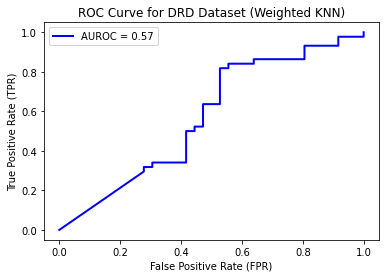

In [149]:
knn = WeightedKNN(K=3, distanceFunction=manhattan)
X_DRDFilteredStandardized = StandardScaler().fit(X_hepatitisOneHot).transform(X_hepatitisOneHot)
true_labels, _, pred_scores = cross_validate(knn, X_DRDFilteredStandardized, y_DRDFilteredFeatures, K=5)
plot_roc(true_labels, pred_scores, title='ROC Curve for DRD Dataset (Weighted KNN)')